In [29]:
import pandas as pd 
import numpy as np
# only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.pipeline import Pipeline


In [30]:
diamonds= pd.read_csv('Diamonds.csv')

In [31]:
#Let’s take a look at the top five rows using the DataFrame’s head() method 
diamonds.head()

,first_row,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
# we can get some  useful information using the info() method to get a quick description of the data, in particular the
#total number of rows, each attribute’s type, and the number of nonnull values
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   first_row  53940 non-null  int64  
 1   carat      53940 non-null  float64
 2   cut        53940 non-null  object 
 3   color      53940 non-null  object 
 4   clarity    53940 non-null  object 
 5   depth      53940 non-null  float64
 6   table      53940 non-null  float64
 7   price      53940 non-null  int64  
 8   x          53940 non-null  float64
 9   y          53940 non-null  float64
 10  z          53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [33]:
diamonds.isna().sum()
#using this code line we did not find any messing value as a first look

first_row    0
carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
dtype: int64

In [34]:
(diamonds==0).sum(axis=0)
#observing that the features x, y, and z have zero values. which makes no sense, since they are the dimensions of the diamonds
#so those zeros are in fact missing values

first_row     0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             8
y             7
z            20
dtype: int64

In [35]:
#using the comand value_counts() method to find out what categories
#exist and how many districts belong to each category

diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [36]:
#The describe() method shows a summary of the
#numerical attributes
diamonds.describe()

,first_row,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


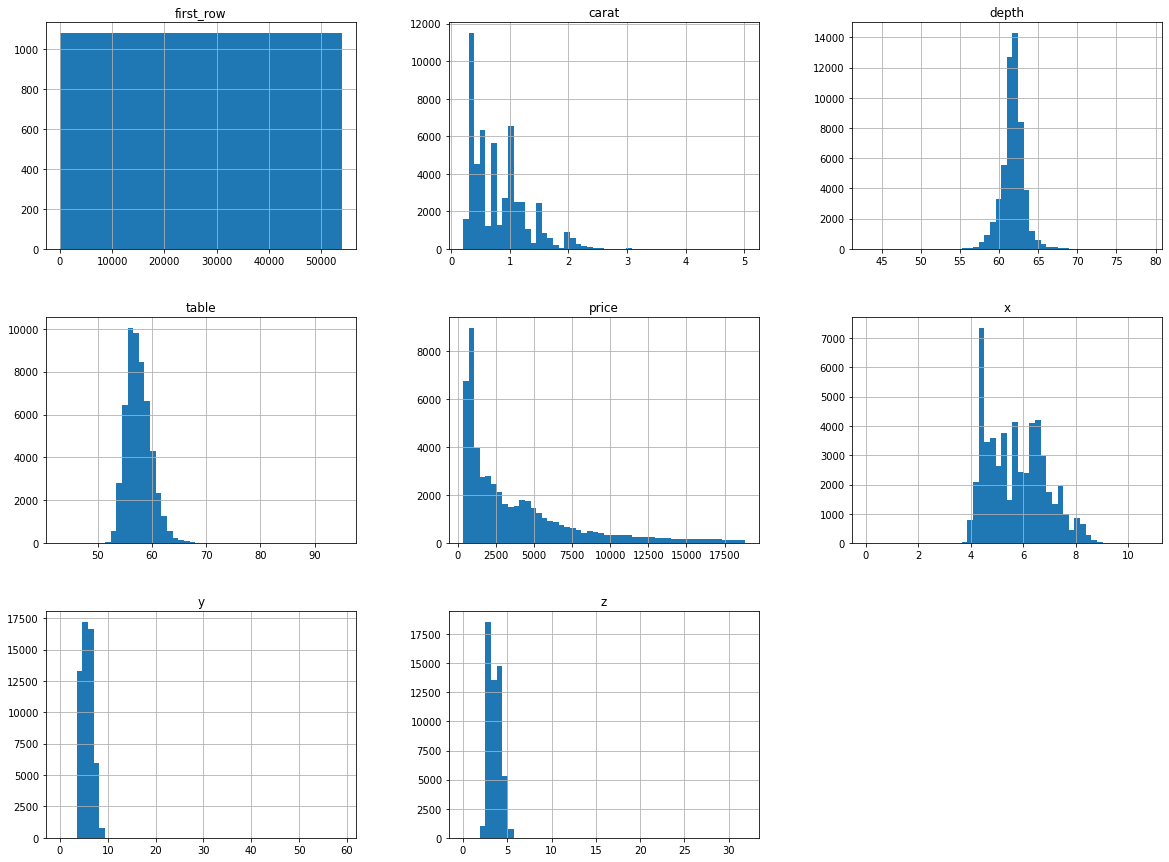

In [38]:
#A histogram shows the number of instances
#for each numirical data
diamonds.hist(bins=50,figsize=(20,15))
plt.show()

In [39]:
diamonds.corr()

,first_row,carat,depth,table,price,x,y,z
first_row,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:xlabel='z', ylabel='price'>

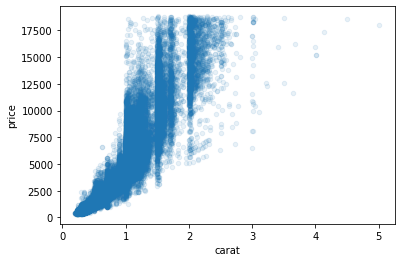

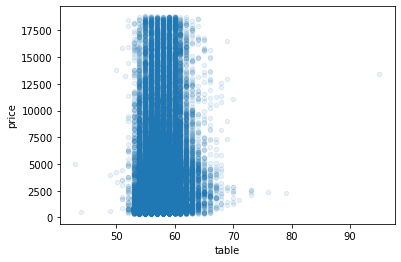

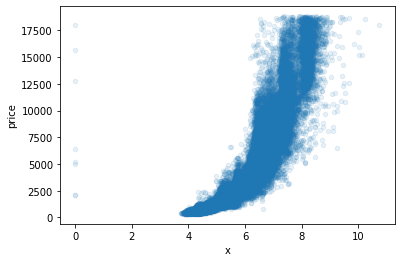

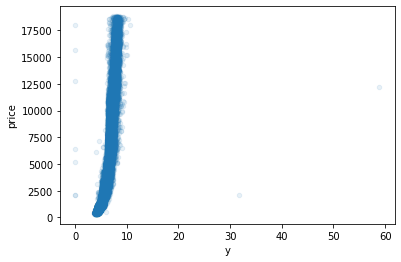

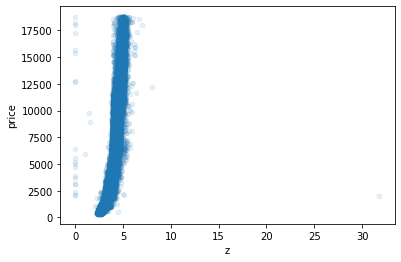

In [40]:
diamonds.plot(kind="scatter", x="carat", y="price", alpha=0.1)
diamonds.plot(kind="scatter", x="table", y="price", alpha=0.1)
diamonds.plot(kind="scatter", x="x", y="price", alpha=0.1)
diamonds.plot(kind="scatter", x="y", y="price", alpha=0.1)
diamonds.plot(kind="scatter", x="z", y="price", alpha=0.1)



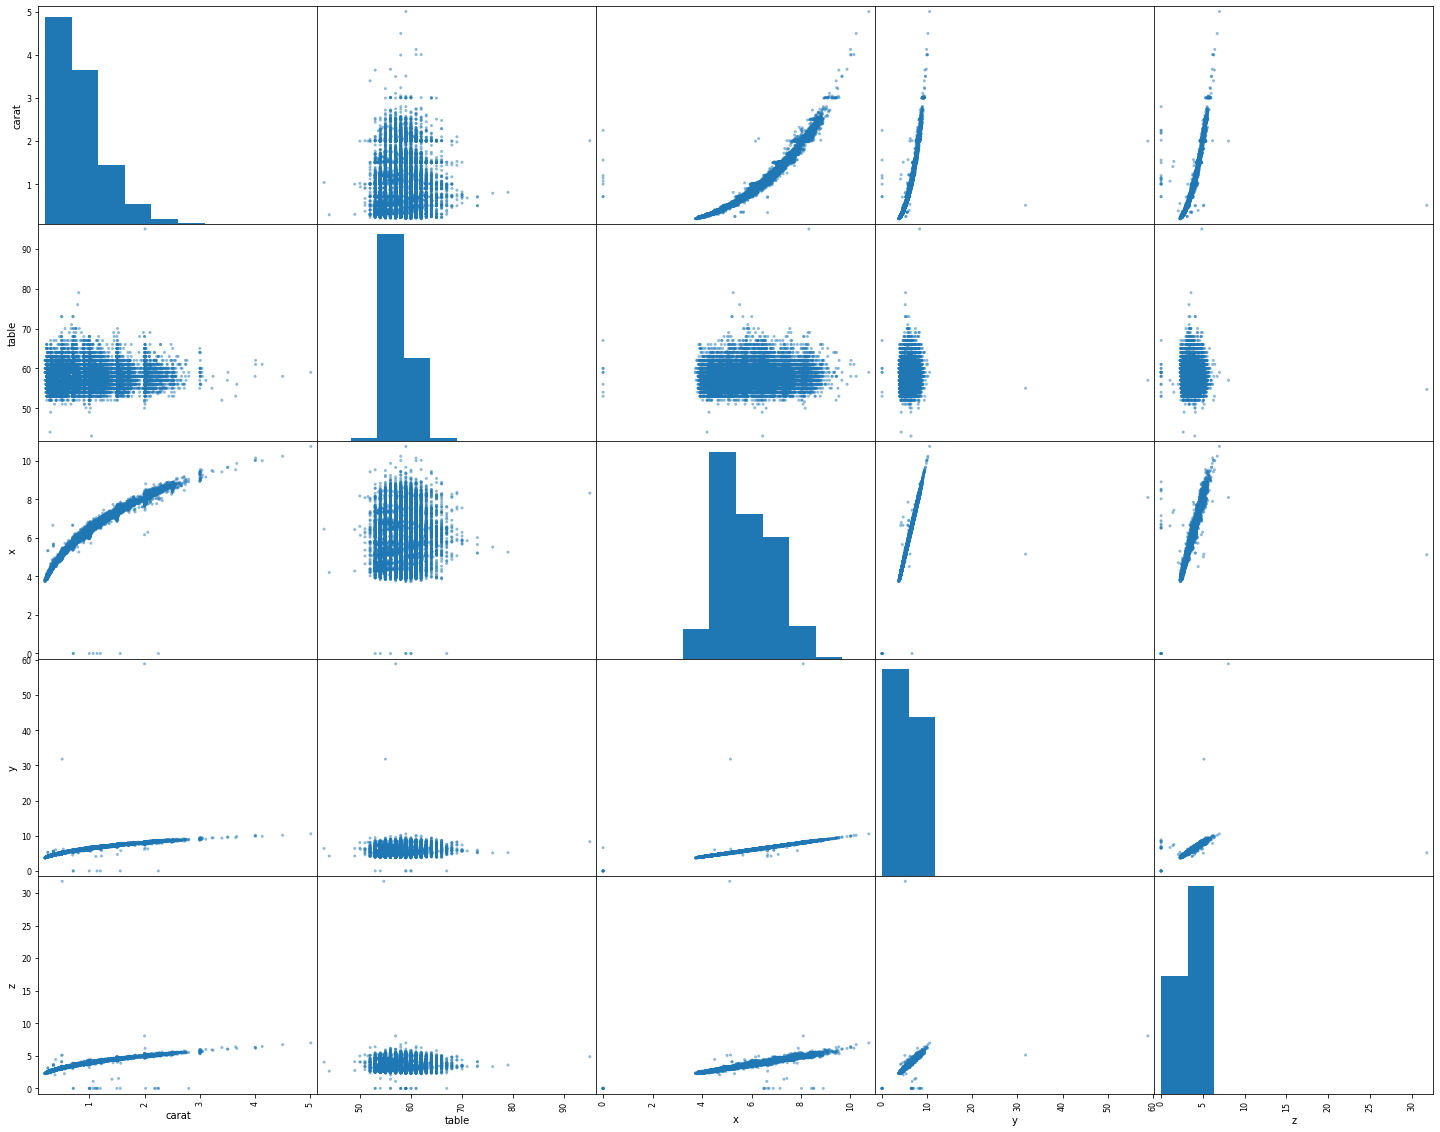

In [41]:
attributes = ["carat", "table", "x",
"y","z"]
scatter_matrix(diamonds[attributes], figsize=(25, 20))
plt.show()

<AxesSubplot:xlabel='carat', ylabel='price'>

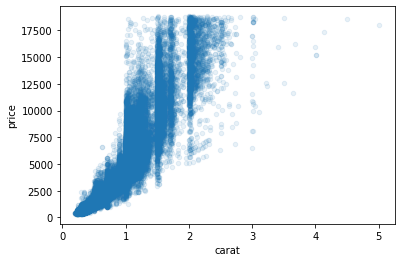

In [42]:
diamonds.plot(kind="scatter", x="carat", y="price",
alpha=0.1)

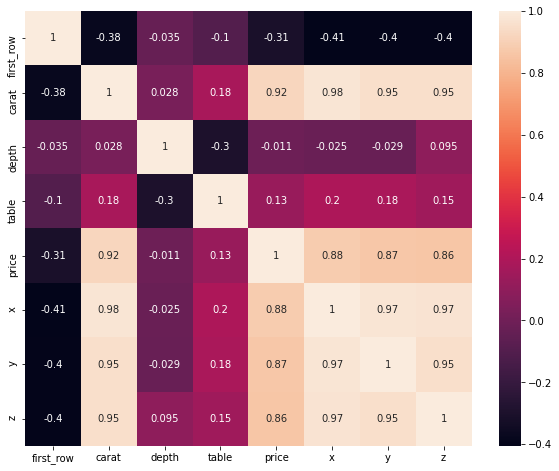

In [43]:
# Create a correlation matrix between every pair of attributes
corr_matrix = diamonds.corr()

# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [46]:
#From the plot  and table above, we could deduce that:
#x, y, z have strong correlations with price
#carat has the strongest correlation with price (0.92)
#table and depth have the weakest correlations
#carat correlates best with price

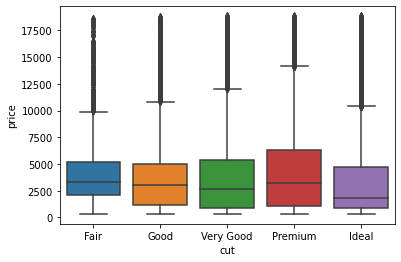

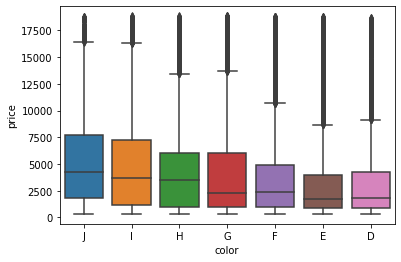

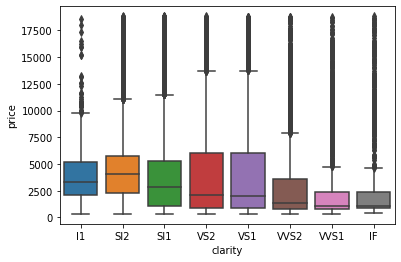

In [47]:
sns.boxplot(x='cut', y='price', data=diamonds, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.show()
sns.boxplot(x='color', y='price', data=diamonds, order=['J', 'I', 'H', 'G', 'F', 'E', 'D'])
plt.show()
sns.boxplot(x='clarity', y='price', data=diamonds, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.show()

# Data preparing 

In [48]:
#down below we had replaced the missing values by the median in x, y, and z.
x_median= diamonds["x"].median()
diamonds["x"].mask(diamonds.x ==0,x_median, inplace=True)
y_median= diamonds["y"].median()
diamonds["y"].mask(diamonds.y ==0,y_median, inplace=True)
z_median= diamonds["z"].median()
diamonds["z"].mask(diamonds.z ==0,z_median, inplace=True)


In [49]:
#removing outliares
print('\n', diamonds[diamonds['y'] > 30], '\n')
print(diamonds[diamonds['z'] > 30], '\n')
diamonds.drop(diamonds[(diamonds['z'] > 30) | (diamonds['y'] > 30)].index, axis=0, inplace=True)


        first_row  carat      cut color clarity  depth  table  price     x  \
24067      24068   2.00  Premium     H     SI2   58.9   57.0  12210  8.09   
49189      49190   0.51    Ideal     E     VS1   61.8   55.0   2075  5.15   

          y     z  
24067  58.9  8.06  
49189  31.8  5.12   

       first_row  carat        cut color clarity  depth  table  price     x  \
48410      48411   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12   

          y     z  
48410  5.15  31.8   



In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [52]:

#split the data into traing set (80%) and test (20%) set.
train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)
#drop the unnamed and price columns for the inputs (x)
diamonds= train_set.drop(["price","first_row"], axis=1)
#set the target (y) under the name of diamonds labels
diamonds_labels=train_set[ "price"].astype(float)
# data cleaningn by Handling the Categorical and numerical Attributes 
diamonds_num= diamonds.drop(columns =['cut', 'color', 'clarity'], axis=1)
num_attribs = list(diamonds_num)
cat_attribs = ["cut", "color", "clarity"]
#data transformation
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler())])

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
])


In [53]:
#appling  all the transformations to the diamonds data
diamonds_prepared = full_pipeline.fit_transform(diamonds)

In [54]:
#last but not least take a final look at the data fllowed by start modeling
pd.DataFrame(diamonds_prepared)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.776699,0.386961,-0.655057,-0.806143,-0.786725,-0.751236,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.445988,-1.776820,0.687764,0.675702,0.786784,0.491373,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.608053,-0.311033,-0.655057,-0.538340,-0.472023,-0.534502,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.608053,-0.380832,1.582978,-0.511559,-0.543955,-0.563400,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.467069,-0.311033,2.030585,0.648921,0.615946,0.592516,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43144,0.530311,0.456761,0.687764,0.666775,0.696869,0.737005,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43145,-0.481568,0.317162,1.135371,-0.404438,-0.391100,-0.361115,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43146,-0.966427,0.177563,-0.655057,-1.118580,-1.092435,-1.083562,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43147,0.214099,0.735958,0.687764,0.354338,0.265278,0.404679,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Comparison study


In order to select the best-fit candidate that can predict better future data a comparison study is necessary. Down below we select three random chose algorithms where the chose will be taken bass on their RMSE.

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(diamonds_prepared, diamonds_labels)

LinearRegression()

In [56]:
from sklearn.metrics import mean_squared_error
diamonds_predictions = lin_reg.predict(diamonds_prepared)
lin_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1134.359174492452

# 2nd model decision tree regressor

In [66]:
# Second Model DecisionTreeRegressor 
#calculate it's rmse
from sklearn.tree import DecisionTreeRegressor 
tree_reg= DecisionTreeRegressor()
tree_reg.fit(diamonds_prepared, diamonds_labels)
diamonds_predictions= tree_reg.predict(diamonds_prepared)
tree_mse=mean_squared_error(diamonds_labels,diamonds_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

9.506479512357524

In [58]:
#now using the decision tree regressor with  cross validation methode 
#that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure
#of how precise this estimate is
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, diamonds_prepared, diamonds_labels,
                    scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [724.79437169 731.85895207 769.45493665 759.95715506 758.90823542
 716.16865059 769.80021388 735.27613675 741.48112263 790.42854842]
Mean: 749.8128323163835
Standard deviation: 22.319289363596322


In [59]:
#now using the LinearRegression with cross validation method 
lin_scores = cross_val_score(lin_reg, diamonds_prepared, diamonds_labels,
                      scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1068.18140705 1141.08118    1184.68271476 1124.18252385 1137.08247738
 1145.84179179 1099.00388699 1197.26912127 1126.56602454 1131.24076505]
Mean: 1135.513189268545
Standard deviation: 35.305481136568076


In [60]:
#this result is worse than the linear regression alone 

In [61]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(diamonds_prepared, diamonds_labels)
diamonds_predictions = forest_reg.predict(diamonds_prepared)
forest_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

207.28535191423987

In [62]:
### the random frest gives the best resualts 

In [63]:
# Evaluation Using Cross-Validation for the RandomForestRegressor model
forest_scores= cross_val_score(forest_reg, diamonds_prepared, diamonds_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_score=np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores: [522.43983818 535.83277909 568.01547727 599.50706684 557.80095499
 537.61642486 567.00353028 533.41652053 557.27458431 576.99994731]
Mean: 555.5907123666002
Standard deviation: 22.32369930341533


# and now we save our 3 models 

In [64]:
import joblib
joblib.dump(lin_reg, "lin_reg.pkl")
joblib.dump(tree_reg, "tree_reg.pkl")
joblib.dump(forest_reg, "forest_reg.pkl")


['forest_reg.pkl']

# for aploding our models for latter use 

In [65]:
lin_reg = joblib.load("lin_reg.pkl")
tree_reg = joblib.load("tree_reg.pkl")
forest_reg = joblib.load("forest_reg.pkl")

# Fine-Tune Your Model

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                             return_train_score=True)
grid_search.fit(diamonds_prepared, diamonds_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
#RMSE for the best score
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

575.2196212449553

In [69]:
#best combination
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [70]:
# another method for the best hyperparameter values
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [71]:
# evaluation scores
cvres= grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)  

852.7851917933261 {'max_features': 2, 'n_estimators': 3}
699.012037184457 {'max_features': 2, 'n_estimators': 10}
670.3580863665038 {'max_features': 2, 'n_estimators': 30}
771.100290526915 {'max_features': 4, 'n_estimators': 3}
652.1960891552684 {'max_features': 4, 'n_estimators': 10}
612.4115342722918 {'max_features': 4, 'n_estimators': 30}
726.7714227880032 {'max_features': 6, 'n_estimators': 3}
619.1973102598301 {'max_features': 6, 'n_estimators': 10}
587.4661901795412 {'max_features': 6, 'n_estimators': 30}
683.1410454138573 {'max_features': 8, 'n_estimators': 3}
605.2668407170025 {'max_features': 8, 'n_estimators': 10}
575.2196212449553 {'max_features': 8, 'n_estimators': 30}
798.1243634383607 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
688.5356792901331 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
775.6148996354852 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
658.7262696383915 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


# Evaluate Your System on the Test Set

In [72]:
final_model = grid_search.best_estimator_
X_test = test_set.drop(['first_row','price'], axis=1)
y_test = test_set["price"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

551.8661811336547

In [73]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                  loc=squared_errors.mean(),
                  scale=stats.sem(squared_errors)))

array([524.94753618, 577.53151257])

In [74]:
#final we had to save the final selected model. that will be use for predicting future data.
import joblib
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

In [75]:
# Evaluation Using Cross-Validation for the RandomForestRegressor model
forest_scores= cross_val_score(forest_reg, diamonds_prepared, diamonds_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_score=np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores: [523.29234232 534.32486122 571.35852035 593.34800547 552.74188204
 543.3704078  566.44663258 541.58037131 558.29423426 567.12461067]
Mean: 555.1881868031517
Standard deviation: 19.44214492892591
